## 1.Loading the dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-data/IMDB-Movie-Data.csv


In [2]:
df=pd.read_csv('../input/imdb-data/IMDB-Movie-Data.csv')

In [3]:
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 2. Data Pre-Proccessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


The highest revenue earned by any movie is `936.63 millioon` where as the minimum earned is 0.00(this may be because the revenue of that movie is not available).

The revenue data of 872 movies out of total 1000 is available, in order to not loose our data, we can give a mean value of revenue to those movies, same can be done to metascore.

In [6]:
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace =True)
df['Revenue (Millions)'].tail()

995    82.956376
996    17.540000
997    58.010000
998    82.956376
999    19.640000
Name: Revenue (Millions), dtype: float64

In [7]:
df[df['Revenue (Millions)']<1]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.0
97,98,The Void,"Horror,Mystery,Sci-Fi",Shortly after delivering a patient to an under...,Jeremy Gillespie,"Aaron Poole, Kenneth Welsh,Daniel Fathers, Kat...",2016,90,5.8,9247,0.15,62.0
152,153,White Girl,Drama,"Summer, New York City. A college girl falls ha...",Elizabeth Wood,"Morgan Saylor, Brian Marc, Justin Bartha, Adri...",2016,88,5.8,4299,0.20,65.0
206,207,Raw (II),"Drama,Horror",When a young vegetarian undergoes a carnivorou...,Julia Ducournau,"Garance Marillier, Ella Rumpf, Rabah Nait Oufe...",2016,99,7.5,5435,0.51,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,The Midnight Meat Train,"Horror,Mystery",A photographer's obsessive pursuit of dark sub...,Ryûhei Kitamura,"Vinnie Jones, Bradley Cooper, Leslie Bibb, Bro...",2008,98,6.1,50255,0.07,58.0
947,948,King Cobra,"Crime,Drama",This ripped-from-the-headlines drama covers th...,Justin Kelly,"Garrett Clayton, Christian Slater, Molly Ringw...",2016,91,5.6,3990,0.03,48.0
949,950,Kicks,Adventure,Brandon is a 15 year old whose dream is a pair...,Justin Tipping,"Jahking Guillory, Christopher Jordan Wallace,C...",2016,80,6.1,2417,0.15,69.0
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.0


In [8]:
df.drop((df[df['Revenue (Millions)']<1]).index,inplace =True)

## 3. Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 


%matplotlib inline

Following are number of movies released per year
2016    270
2015    111
2014     92
2013     83
2012     62
2011     61
2010     54
2007     52
2008     49
2009     47
2006     43
Name: Year, dtype: int64


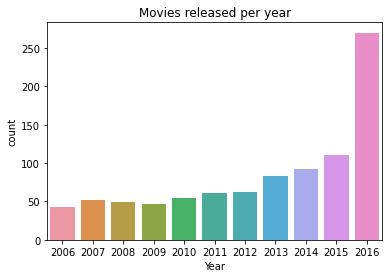

In [10]:
print('Following are number of movies released per year')
print(df.Year.value_counts())
plt.title("Movies released per year")
sns.countplot(x=df['Year'],data =df);

Most of the movies of the datset were released in 2016.

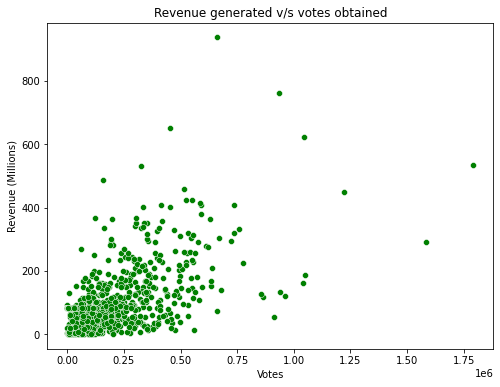

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='Revenue (Millions)',x=df['Votes'],data=df,color='green');
plt.title("Revenue generated v/s votes obtained");

The plot is clustered near origin, it can be assumed out with the increasing Revenue, the number of votes hardly increase.
Also, there are very few movies with very high revenue.

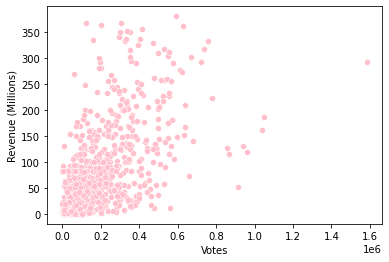

In [12]:
sns.scatterplot(y='Revenue (Millions)',x=df['Votes'],data=df.loc[df['Revenue (Millions)']<400],color='pink');

This concludes, that Revenue generated and votes earned by the movies are not linearly realated.

### Movies and Runtime 

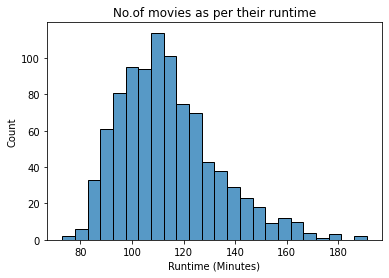

In [13]:
sns.histplot(x='Runtime (Minutes)',data=df);
plt.title('No.of movies as per their runtime');

This is bell shape curve, that means most of the movies runtime is around the median,that is 80 minutes to 120 minutes duration.

In [14]:
df.groupby("Year")['Revenue (Millions)'].mean()

Year
2006     88.137971
2007     89.192606
2008    104.813395
2009    119.645436
2010    115.506095
2011     90.404695
2012    111.446129
2013     95.346375
2014     90.516908
2015     90.201165
2016     69.757469
Name: Revenue (Millions), dtype: float64

Highest revenue was generated in year 2009 which was ~112 Millions

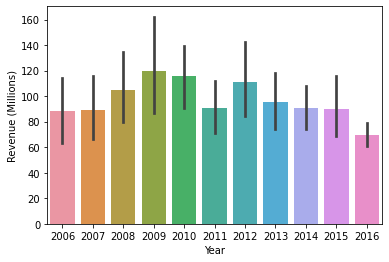

In [15]:
sns.barplot(x='Year',y='Revenue (Millions)',data=df);

### Movies with highest and the lowest Revenues

In [16]:
print("The movie with the highest Revenue:")
df[df['Revenue (Millions)'].max()==df['Revenue (Millions)']]

The movie with the highest Revenue:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [17]:
print("The movie with the highest Revenue:")
df[df['Revenue (Millions)'].min()==df['Revenue (Millions)']]

The movie with the highest Revenue:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
467,468,Enemy,"Mystery,Thriller",A man seeks out his exact look-alike after spo...,Denis Villeneuve,"Jake Gyllenhaal, Mélanie Laurent, Sarah Gadon,...",2013,91,6.9,111558,1.01,61.0


The movie with the highest Revenue is `Star Wars:Episode VII- The forces Awakens` and the with the lowest revenue is `Enemy` 

### Movies with higher Metascores

In [18]:
df[['Rank','Title','Votes','Genre']].loc[df['Metascore']>95]

,Rank,Title,Votes,Genre
21,22,Manchester by the Sea,134213,Drama
41,42,Moonlight,135095,Drama
111,112,12 Years a Slave,486338,"Biography,Drama,History"
230,231,Pan's Labyrinth,498879,"Drama,Fantasy,War"
489,490,Ratatouille,504039,"Animation,Comedy,Family"
509,510,Gravity,622089,"Drama,Sci-Fi,Thriller"
656,657,Boyhood,286722,Drama


Out of 7 movies, 6 belongs to Genre `Drama`, this indicates, audience like the movie having drama in it.

### Movies with higher Votes

In [19]:
df[['Rank','Title','Votes','Genre']].loc[df['Votes']>800000]

,Rank,Title,Votes,Genre
36,37,Interstellar,1047747,"Adventure,Drama,Sci-Fi"
54,55,The Dark Knight,1791916,"Action,Crime,Drama"
64,65,The Prestige,913152,"Drama,Mystery,Sci-Fi"
76,77,The Avengers,1045588,"Action,Sci-Fi"
77,78,Inglourious Basterds,959065,"Adventure,Drama,War"
80,81,Inception,1583625,"Action,Adventure,Sci-Fi"
82,83,The Wolf of Wall Street,865134,"Biography,Comedy,Crime"
87,88,Avatar,935408,"Action,Adventure,Fantasy"
99,100,The Departed,937414,"Crime,Drama,Thriller"
124,125,The Dark Knight Rises,1222645,"Action,Thriller"


With the above two code output, it can be concluded, the people like movies with the drama in it

### Movies with higher Rating

In [20]:
df[['Rank','Title','Votes','Genre']].loc[df['Rating']>8.5]

,Rank,Title,Votes,Genre
36,37,Interstellar,1047747,"Adventure,Drama,Sci-Fi"
54,55,The Dark Knight,1791916,"Action,Crime,Drama"
80,81,Inception,1583625,"Action,Adventure,Sci-Fi"
96,97,Kimi no na wa,34110,"Animation,Drama,Fantasy"
117,118,Dangal,48969,"Action,Biography,Drama"
249,250,The Intouchables,557965,"Biography,Comedy,Drama"


Lets explore more on these movies

In [21]:
top_movies = df.loc[df['Rating']>8.5]
top_movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0


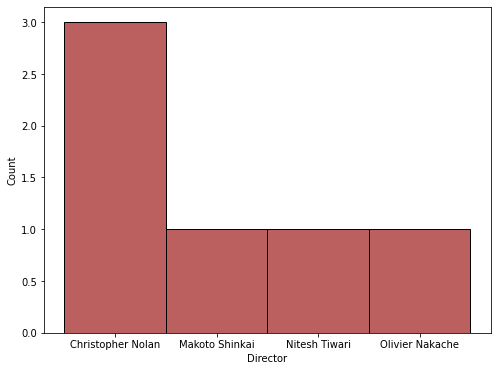

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(x='Director',data=top_movies,color='brown');

Out of 6, 3 movies with the higher rating were directed by `Christopher Nolan`.

### Director who earned the highest Revenue

In [23]:
df.Director.nunique()

584

There are total 584 directors

In [24]:
max_revenue = df.sort_values(by=['Revenue (Millions)'],ascending = False,axis =0).head(5)

In [25]:
max_revenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [26]:
max_revenue.Director

50          J.J. Abrams
87        James Cameron
85      Colin Trevorrow
76          Joss Whedon
54    Christopher Nolan
Name: Director, dtype: object

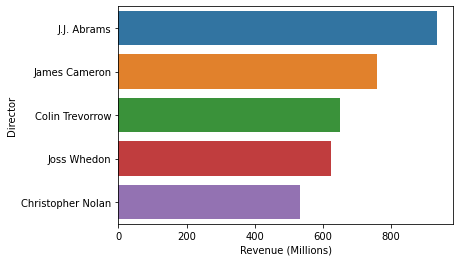

In [27]:
sns.barplot(x='Revenue (Millions)',y='Director',data=max_revenue);